In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
#plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')
print(len(df))
df.head(10)

284807


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
def numeric_distribution_plot(df):
    """Plots a seaborn displot for all numeric features in the dataset"""
    num_features = df.select_dtypes(exclude='object').columns # only include numeric features
    print(f"There are {len(num_features)} numeric features in the dataset")
    for feature in num_features:
        plt.figure(figsize=(12, 5))
        sns.displot(data=df, x=feature)
        plt.show()

There are 31 numeric features in the dataset


<Figure size 864x360 with 0 Axes>

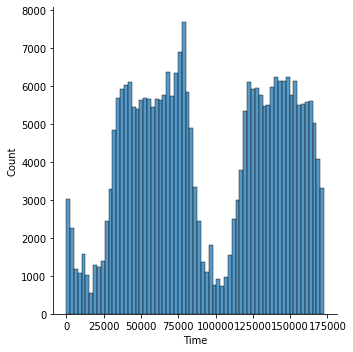

<Figure size 864x360 with 0 Axes>

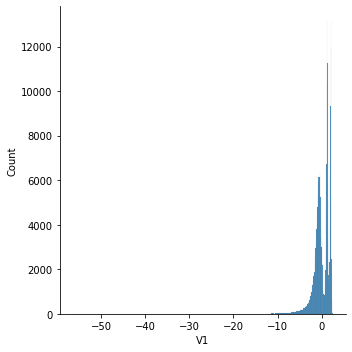

<Figure size 864x360 with 0 Axes>

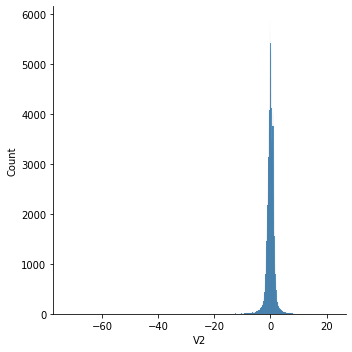

<Figure size 864x360 with 0 Axes>

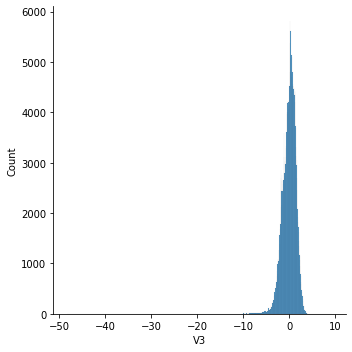

<Figure size 864x360 with 0 Axes>

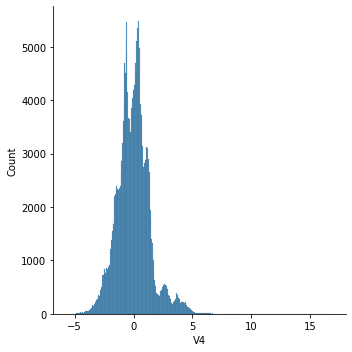

<Figure size 864x360 with 0 Axes>

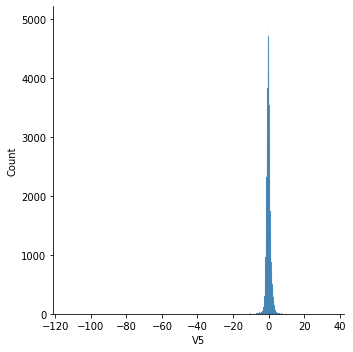

<Figure size 864x360 with 0 Axes>

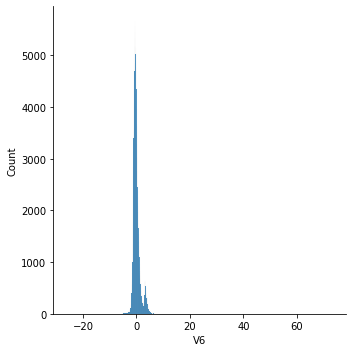

<Figure size 864x360 with 0 Axes>

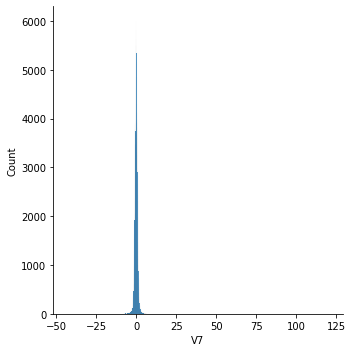

<Figure size 864x360 with 0 Axes>

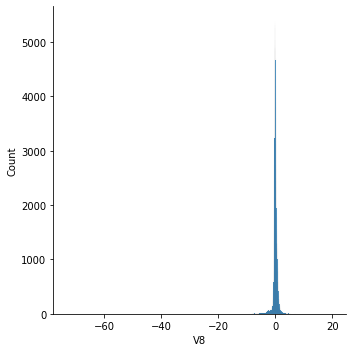

<Figure size 864x360 with 0 Axes>

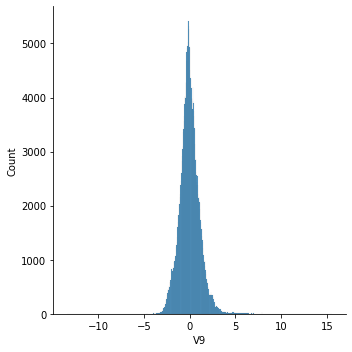

<Figure size 864x360 with 0 Axes>

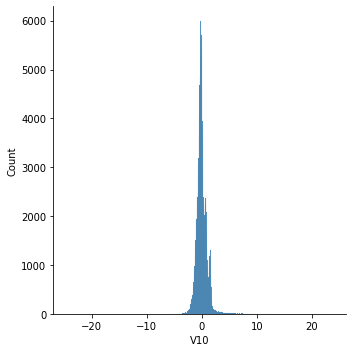

<Figure size 864x360 with 0 Axes>

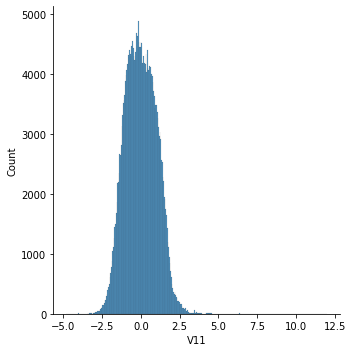

<Figure size 864x360 with 0 Axes>

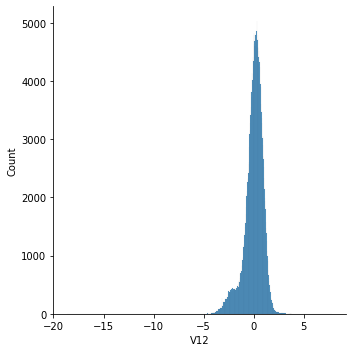

<Figure size 864x360 with 0 Axes>

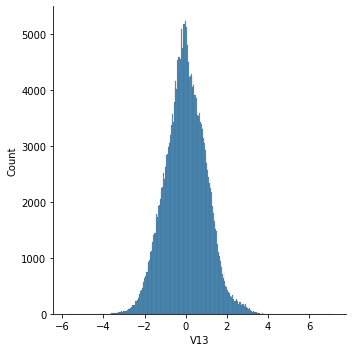

<Figure size 864x360 with 0 Axes>

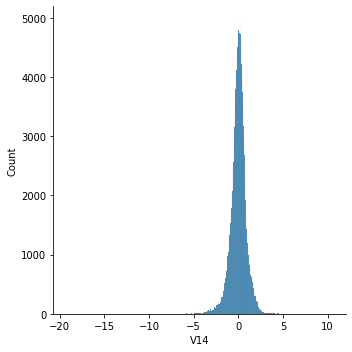

<Figure size 864x360 with 0 Axes>

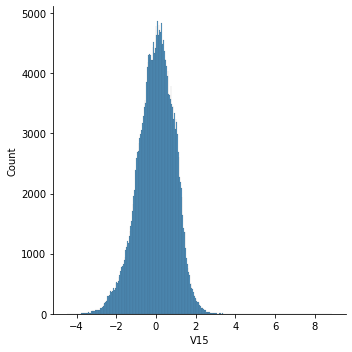

<Figure size 864x360 with 0 Axes>

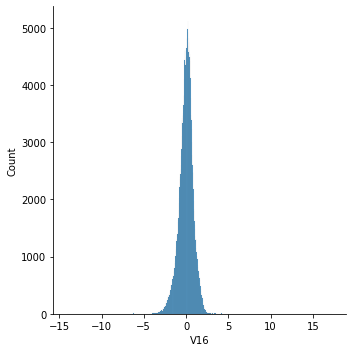

<Figure size 864x360 with 0 Axes>

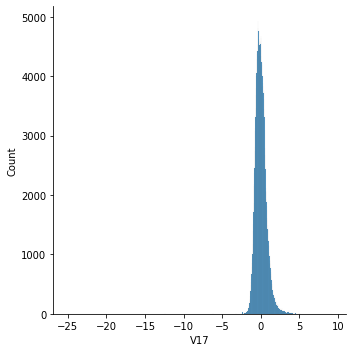

<Figure size 864x360 with 0 Axes>

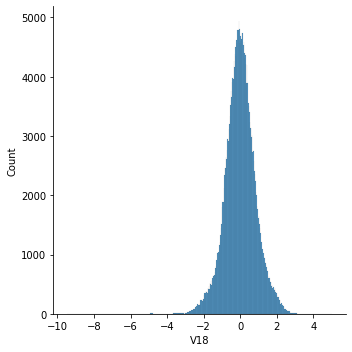

<Figure size 864x360 with 0 Axes>

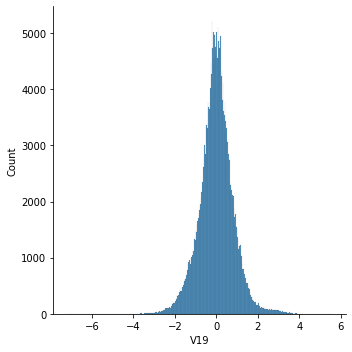

<Figure size 864x360 with 0 Axes>

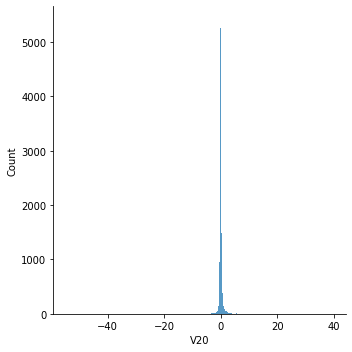

<Figure size 864x360 with 0 Axes>

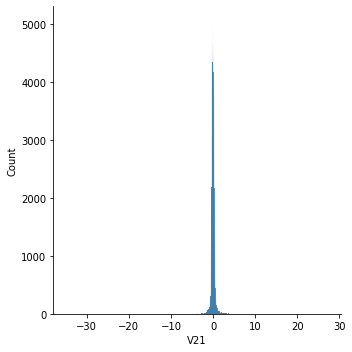

<Figure size 864x360 with 0 Axes>

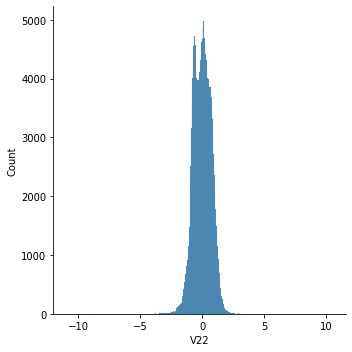

<Figure size 864x360 with 0 Axes>

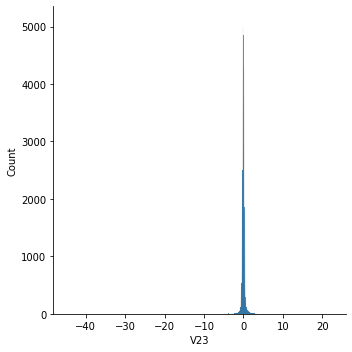

<Figure size 864x360 with 0 Axes>

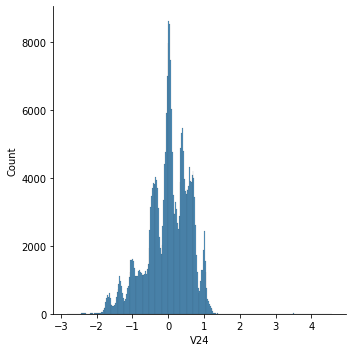

<Figure size 864x360 with 0 Axes>

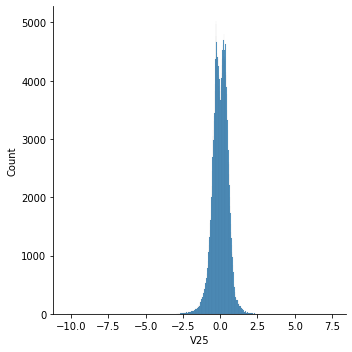

<Figure size 864x360 with 0 Axes>

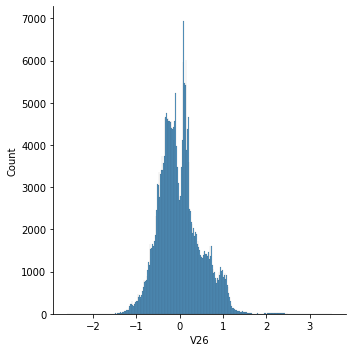

<Figure size 864x360 with 0 Axes>

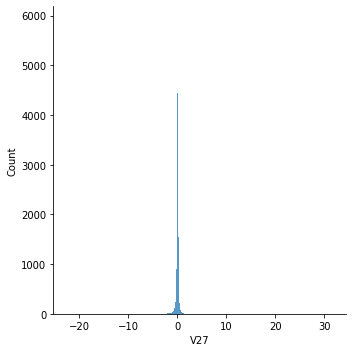

<Figure size 864x360 with 0 Axes>

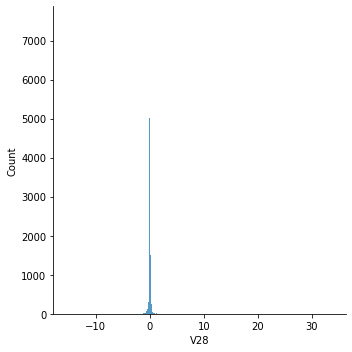

<Figure size 864x360 with 0 Axes>

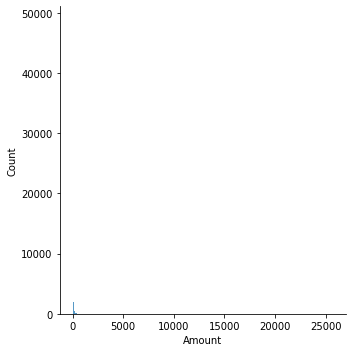

<Figure size 864x360 with 0 Axes>

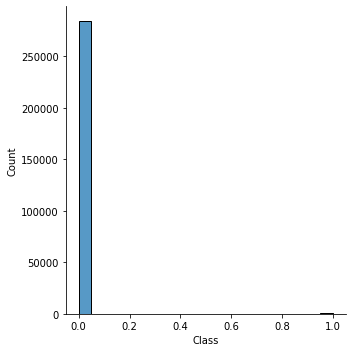

In [4]:
numeric_distribution_plot(df)

From the dataset description, we see that features V1 to V28 are feaures learned from a PCA done on the original dataset while Time, Amount and Class are the features left untouched.

Time refers to the seconds elapsed between each transaction and the first transaction in the dataset.

Amount is the transaction amount.

From the displot above, we understand that the V-features are centered around 0 and have a low range.

It might make some sense to convert Time (which is in seconds) to other scales like hours or days

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

No missing entry. 

Let's see how the dataframe fare in class imbalance

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

As we can see from above, the dataframe with 284807 is heavily imbalanced with 99.8% of its entries being of the Class 0 - negative class.

<AxesSubplot:xlabel='Class', ylabel='count'>

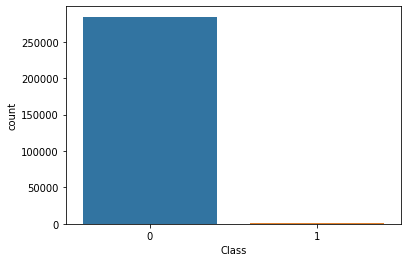

In [7]:
# let's visualize this

sns.countplot(x='Class', data=df)

In [8]:
import plotly.express as px
fig = px.pie(df.Class,values = df.Class.value_counts(),
             names=['Genuine', 'Fraud'], title='Genuine vs Fraud Transactions in Data')
fig.show()

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Let's try and see if there's a meaningful correlation between the Amount feature and the Class.

In [10]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
display(df[df['Amount'] == df['Amount'].max()])
display(df[df['Amount'] == df['Amount'].min()])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.34736,-3.872425,...,-21.62012,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
383,282.0,-0.356466,0.725418,1.971749,0.831343,0.369681,-0.107776,0.751610,-0.120166,-0.420675,...,0.020804,0.424312,-0.015989,0.466754,-0.809962,0.657334,-0.043150,-0.046401,0.0,0
514,380.0,-1.299837,0.881817,1.452842,-1.293698,-0.025105,-1.170103,0.861610,-0.193934,0.592001,...,-0.272563,-0.360853,0.223911,0.598930,-0.397705,0.637141,0.234872,0.021379,0.0,0
534,403.0,1.237413,0.512365,0.687746,1.693872,-0.236323,-0.650232,0.118066,-0.230545,-0.808523,...,-0.077543,-0.178220,0.038722,0.471218,0.289249,0.871803,-0.066884,0.012986,0.0,0
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1
575,430.0,-1.860258,-0.629859,0.966570,0.844632,0.759983,-1.481173,-0.509681,0.540722,-0.733623,...,0.268028,0.125515,-0.225029,0.586664,-0.031598,0.570168,-0.043007,-0.223739,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283719,171817.0,-0.750414,0.904175,0.996461,0.427284,1.720336,0.929256,0.794272,0.176719,-1.836261,...,0.050750,0.115532,-0.623995,-0.186896,0.733759,2.558151,-0.188835,0.001654,0.0,0
283782,171870.0,2.083677,-0.065811,-1.442870,0.135416,0.043035,-1.306975,0.335835,-0.371635,0.730560,...,-0.147536,-0.246599,0.194758,-0.082277,0.012887,-0.069278,-0.048995,-0.065482,0.0,0
283949,172027.0,2.132569,-0.057836,-1.724522,-0.030326,0.412146,-0.903088,0.345843,-0.348132,0.722638,...,-0.188739,-0.343876,0.105024,-0.763831,0.117381,-0.027682,-0.047514,-0.071700,0.0,0
284085,172140.0,-2.210521,-1.039425,0.189704,-1.291932,3.742120,-1.665061,3.120388,-2.324089,0.364926,...,-0.286359,1.326003,-0.361764,-0.268117,1.051309,0.334629,-1.930149,-0.899888,0.0,0


I guess these 1825 rows of transaction Amount 0.0 are cases where the cards declined. Let's see how many of these transactions are a Class 1 (Positive - Fraud class). Given an overall low observations of the Class 1, we should expect this number to be quite low.

In [12]:
temp = df[df['Amount'] == df['Amount'].min()]

len(temp[temp['Class'] == 1])

27

We have 27 out of 492 observations from declined transactions - that's 5.48% of Class 1 transactions.

Let's see how the Amount class fare

In [13]:
temp = df[['Amount', 'Class']]
corr = temp.corr()
corr['Amount']

Amount    1.000000
Class     0.005632
Name: Amount, dtype: float64

We see a tiny positive overall correlation of Amount with Class. This roughly means a very tiny correlation of higher amounts with a Fraud transaction.

In [14]:
# let's visualize this
# Distribution of fraud transactions amount
fig = px.scatter(df.query("Class==1"), x = 'Amount', y =df.query("Class==1").index,
                title = 'Distribution of Fraud transactions Amounts')
fig.update_layout(xaxis_title='Transaction Amount',
                    yaxis_title='No. of Transactions')
fig.show()

Let's see the overall correlation of the dataframe

In [15]:
corr = df.corr()
corr['Class'].sort_values()

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

As we see, V17 and V14 have the highest absolute correlation with the Class - they affect the Class transactions the most. As they are negative, we understand that an increase in the feature will tend to correlate with a Class 0 transaction (a decrease). However, care should be taken in coming to this conclusion as most of the observations in the dataset are of Class 0 to begin with. In loose terms, the feature V11 which is most strongly positive correlated is the most confident class with a fraud transaction.

In [16]:
df['V11'].describe()

count    2.848070e+05
mean     1.673327e-15
std      1.020713e+00
min     -4.797473e+00
25%     -7.624942e-01
50%     -3.275735e-02
75%      7.395934e-01
max      1.201891e+01
Name: V11, dtype: float64

In [17]:
# let's split the data
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df['Class']):
    X_train, X_test = df.iloc[train_index], df.iloc[test_index]
    y_train, y_test = df['Class'].iloc[train_index], df['Class'].iloc[test_index]

In [18]:
len(X_train), len(y_train)

(227845, 227845)

In [19]:
display(X_train.head())
display(y_train.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
265518,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,0
180305,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0
42664,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0
198723,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,0
82325,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,0


265518    0
180305    0
42664     0
198723    0
82325     0
Name: Class, dtype: int64

In [20]:
# let's reset the indices

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [21]:
display(X_train.head())
display(y_train.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,0
1,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0
2,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0
3,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,0
4,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,0


0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [22]:
# let's see if they reserve the ratio of imbalance
y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [23]:
y_test.value_counts()

0    56864
1       98
Name: Class, dtype: int64

In [24]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,0
1,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0
2,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0
3,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,0
4,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,0


Let's investigate the Time feature on its correlation with the Class

In [25]:
corr = X_train.corr()
corr['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.153709
V4        0.135014
V2        0.090586
V21       0.035588
V19       0.032380
V8        0.020552
V20       0.019385
V27       0.016034
V28       0.009810
Amount    0.006211
V26       0.004119
V22       0.002926
V25       0.001618
V23      -0.004169
V15      -0.005705
V13      -0.005861
V24      -0.007483
Time     -0.010564
V6       -0.043334
V5       -0.093578
V9       -0.098247
V1       -0.100041
V18      -0.108732
V7       -0.186184
V16      -0.193826
V3       -0.194135
V10      -0.217894
V12      -0.259989
V14      -0.301054
V17      -0.321937
Name: Class, dtype: float64

With the tiny correlation, we can decide to drop or leave the feature. 

We can decide to convert to hour so there are smaller numbers to deal with


In [26]:
X_train['Time'] = X_train['Time']/3600 # number of seconds in an hour
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,44.977500,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,0
1,34.576944,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0
2,11.441944,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0
3,36.840000,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,0
4,16.488611,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,0


In [27]:
# similarly
X_test['Time'] = X_test['Time']/3600

In [28]:
# let's drop the Class features from both
X_train.drop('Class', axis = 1, inplace = True)
X_test.drop('Class', axis=1, inplace=True)

In [29]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,44.977500,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32
1,34.576944,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99
2,11.441944,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10
3,36.840000,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10
4,16.488611,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10


## ML Models

Before using the ML models on the dataset, let's scale the features

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
X_train[0]

array([ 1.41158751,  0.99337908, -0.45603659, -0.89405156, -0.46728372,
        1.08921729,  3.02438347, -1.19485202,  0.95705742,  1.28137638,
       -0.1445464 , -0.11081458,  0.50933857,  0.06211735, -0.06955768,
        1.45109663,  0.4044464 , -0.90740352,  0.16913345, -0.55536574,
       -0.17311239,  0.10317115,  0.40956311,  0.49068498,  1.14196982,
       -0.67083198, -0.80722695,  0.19191152, -0.09910576, -0.32249376])

### Logistic Regression Baseline

In [32]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [33]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, precision_score

baseline_recall = recall_score(y_test, y_pred)
baseline_acc = accuracy_score(y_test, y_pred)
baseline_f1 = f1_score(y_test, y_pred)
baseline_auc = roc_auc_score(y_test, y_pred)
baseline_precision = precision_score(y_test, y_pred)

print(f"Metrics: Recall: {baseline_recall}, Accuracy: {baseline_acc}, F1: {baseline_f1}, AUC: {baseline_auc}, Precision: {baseline_precision}")

Metrics: Recall: 0.6530612244897959, Accuracy: 0.9991748885221726, F1: 0.7314285714285713, AUC: 0.8264163044227257, Precision: 0.8311688311688312


The baseline performed quite well on this task. Let's create another model to improve performance

### Baseline + Cross Validation

In [38]:
from sklearn.model_selection import StratifiedKFold


def train_model(model, X_train = X_train, y_train = y_train):
    """trains the dataset with model using cross validation of n_splits
    Args: 
         model - model to use in training the dataset
         X_train - np array of train without the target. defaults to X_train from preprocessing stage
         y_train - np array of target
    """
    n_splits = 5
    kfold = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for train_index, test_index in kfold.split(X_train, y_train):
        X_train_folds = X_train[train_index] 
        y_train_folds = y_train[train_index]
        X_test_folds = X_train[test_index]
        y_test_folds = y_train[test_index]
        
        model.fit(X_train_folds, y_train_folds)
        y_pred = model.predict(X_test_folds)
        
        accuracy.append(accuracy_score(y_test_folds, y_pred))
        precision.append(precision_score(y_test_folds, y_pred))
        recall.append(recall_score(y_test_folds, y_pred))
        f1.append(f1_score(y_test_folds, y_pred))
    
    accuracy = round(sum(accuracy)/len(accuracy), 2)
    precision = round(sum(precision)/len(precision), 2)
    recall = round(sum(recall)/len(recall), 2)
    f1 = round(sum(f1)/len(f1), 2)
    
    y_pred = model.predict(X_test)
    test_accuracy = round(accuracy_score(y_test, y_pred), 2)
    test_precision = round(precision_score(y_test, y_pred), 2)
    test_recall = round(recall_score(y_test, y_pred), 2)
    test_f1 = round(f1_score(y_test, y_pred), 2)
    
    print(f"train accuracy: {accuracy}\t\t test accuracy: {test_accuracy}")
    print(f"train precision: {precision}\t\t test precision: {test_precision}")
    print(f"train recall: {recall}\t\t test recall: {test_recall}")
    print(f"train f1: {f1}\t\t test f1: {test_f1}")
    return test_accuracy, test_precision, test_recall, test_f1

In [39]:
baseline_acc, baseline_precision, baseline_recall, baseline_f1 = train_model(log_reg)

train accuracy: 1.0		 test accuracy: 1.0
train precision: 0.88		 test precision: 0.83
train recall: 0.63		 test recall: 0.65
train f1: 0.73		 test f1: 0.73


### Random Forest Classification

In [40]:
from sklearn.ensemble import RandomForestClassifier

rnd_classifier = RandomForestClassifier(n_estimators=500, max_depth=4, random_state=42, max_features=6, n_jobs=-1)

In [42]:
rnd_acc, rnd_precision, rnd_recall, rnd_f1 = train_model(rnd_classifier)

train accuracy: 1.0		 test accuracy: 1.0
train precision: 0.91		 test precision: 0.91
train recall: 0.7		 test recall: 0.74
train f1: 0.79		 test f1: 0.82
